# Write a small paragraph describing the dataset that you choose, its features, number of instances, nature of the data, and anything else that you found to be interesting.

### The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.


### The dataset I have chosen for this assignment consists of cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival statistics of breast cancer surgery patients.


- Dataset: Haberman's Survival Data
- Number of Features: 4
- Number of Instances: 306
- Number of Classes: 2

#### Attributes:
- Age of patient at time of operation (numerical)
- Patient's year of operation (year - 1900, numerical)
- Number of positive axillary nodes detected (numerical)

#### Classes: Survival status (class attribute)
- 1 -> the patient survived 5 years or longer
- 2 -> the patient died within 5 year

# Provide a brief analysis of the dataset you downloaded. Does it have missing data? Are the features numeric/discrete/categorical? Create some histograms/boxplots/other visualizations to illustrate the content of the dataset.

### From Above we can make the following inference 
- #### It has no missing data.
- #### The features are numeric.

Now Let's load the dataset

In [0]:
import pandas as pd

fileURL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data'
data = pd.read_csv(fileURL, names=['Age', 'YearOfSurgery', 'NumOfAxillaryNodes', 'Class'], header=None)

In [2]:
data.head()

,Age,YearOfSurgery,NumOfAxillaryNodes,Class
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


A histogram would give us a good overall picture of the contents of the dataset.

Populating the interactive namespace from numpy and matplotlib


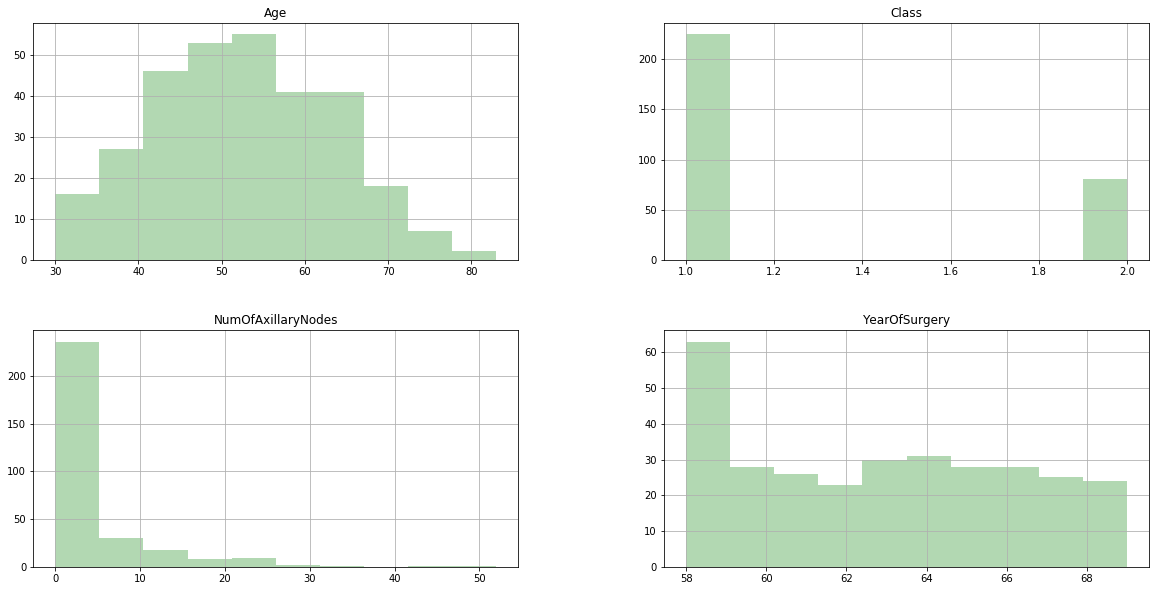

In [3]:
%pylab inline
data_hist = data.hist(color='g',alpha=0.3, figsize=(20,10))

Lets take a look at the box plot to further asses the data.

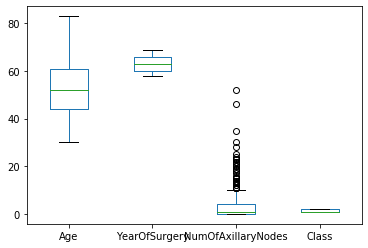

In [4]:
data_box = data.boxplot(grid=False, return_type='axes')

# Using scikit-learn’s DecisionTreeClassifier, train a supervised learning model that can be used to generate predicions for your data.

Let's train the dataset so that we can 

In [5]:
from sklearn import tree

X = data.as_matrix(['Age', 'NumOfAxillaryNodes'])
Y = data.as_matrix(['Class'])

X_train = X[:245]
Y_train = Y[:245]

X_test = X[245:]
Y_test = Y[245:]

decTreeClf = tree.DecisionTreeClassifier()
decTreeClf = decTreeClf.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


# Create a visualization of your tree.

In [0]:
tree.export_graphviz(decTreeClf, 
                     feature_names=['Age', 'NumOfAxillaryNodes'],
                     class_names=['Survived','Died'],
                     filled=True, rounded=True,
                     out_file='survival_stats.dot')

Converting the .dot file to .png format for visualization.

In [0]:
import pydot

(graph,) = pydot.graph_from_dot_file('survival_stats.dot')
graph.write_png('survival_stats.png')

Creating a visualization of the decision tree.

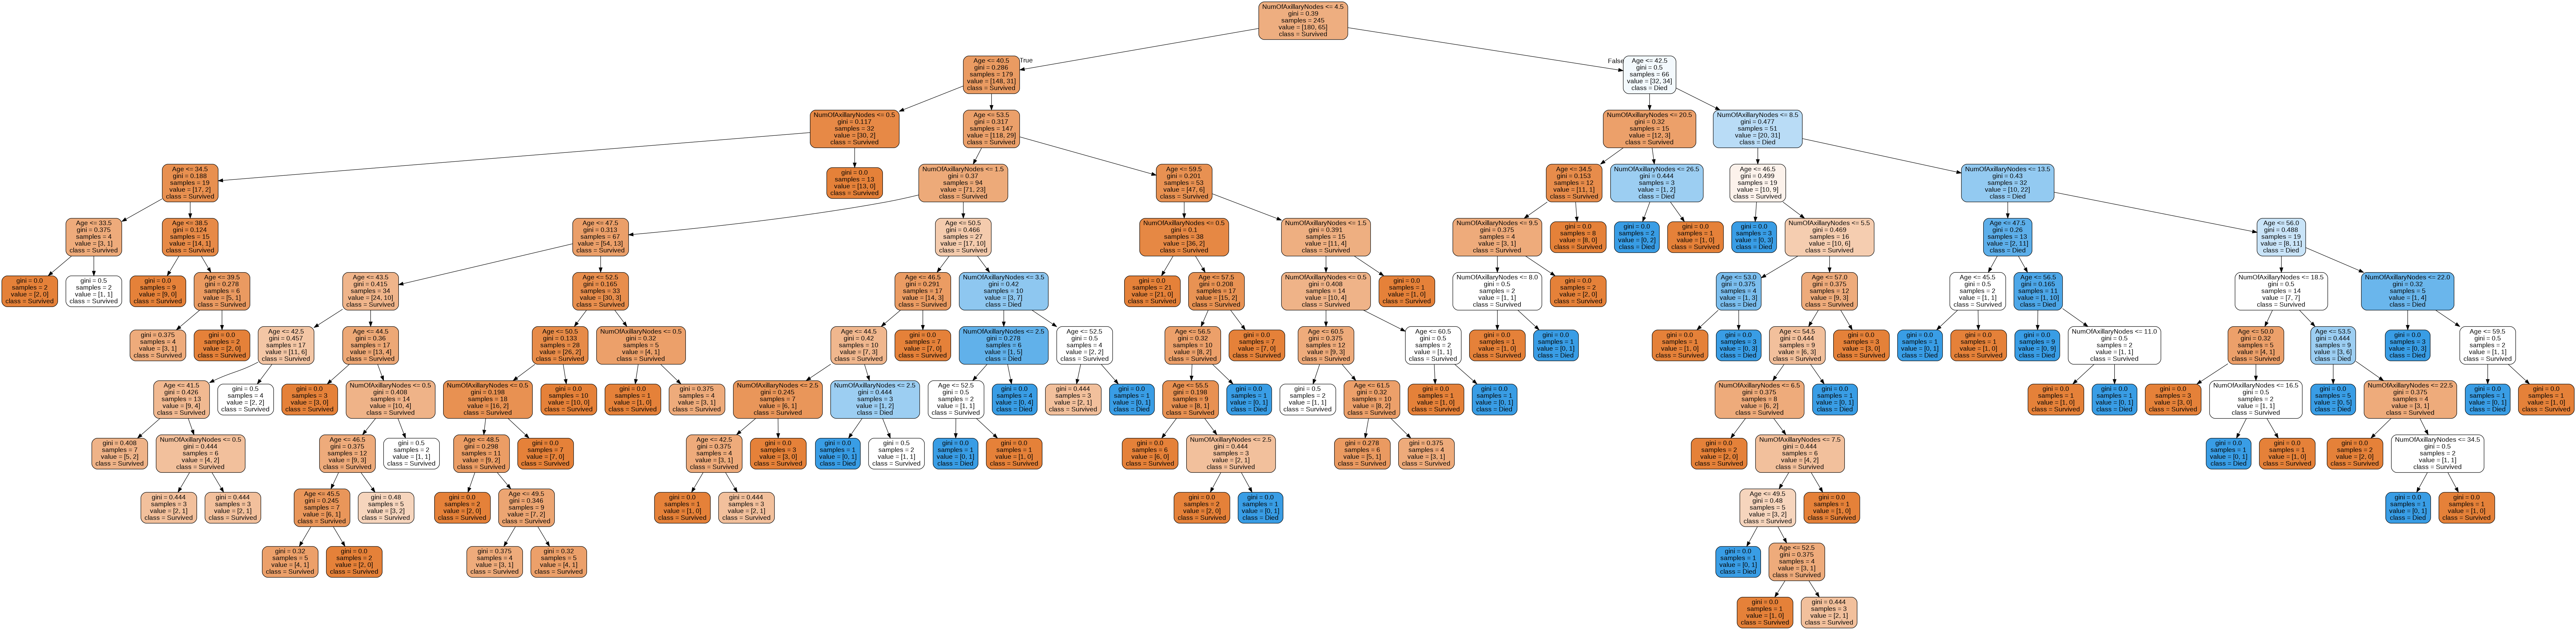

In [11]:
from IPython.core.display import Image

Image(filename='survival_stats.png',width=2500, height=1500)

# Create a new instance with your choice of values for each of the features. Use your trained model to generate a prediction for it. Using your tree illustration as a reference, write a short paragraph describing how your model went about generating that specific prediction. Does it make sense to you? Can it be improved? Go back and play with the parameters that you used for training your tree and see if you can obtain better results.

###Prediction 1: Lets predict if a person with age 63 and 0 Axillary nodes would survive.

In [22]:
X_test[1]

array([63,  0])

In [23]:
Y_test[1]

array([1])

####Now to predict if the patient survived 5 years or longer, i.e., **1** for **Survived** status

X[2] = [[63, 0]]; Y[0] = 1 => Survived

In [12]:
decTreeClf.predict([[63, 0]])

array([1])

### Prediction 2: Lets Predict if a person with age 65 and 22 Axillary nodes would not survive.

In [16]:
X_test[15]

array([65, 22])

In [15]:
Y_test[15]

array([2])

####Now to predict if the patient did not survive within 5 years, i.e., **2** for **Did not Survive** status

X_test[15] = [[65, 22]] and Y_test[15] = 2 => Did not survive

In [17]:
decTreeClf.predict([[65, 22]])

array([2])

After studying the dataset, we can say that the final decision is stable and attainable from following various paths in the tree. It is evident from the above predictions, that an arbitrary selection of X and Y when procured from the test data set produces matching prediction when referenced against actual Y values of the test data set.

Thus, we can make the following inference:

1.   For Prediction 1, we wanted to see if the patient survived 5 years or longer, i.e the prediction path taken for a person of age 63 and 0 Axillary nodes has survived.

  If we follow the path from the tree, it looks as follows: 
*Node <= 4.5 -> true -> Age <= 40.5 -> false -> Age <= 53.5 -> false -> Age <= 59.5 -> false -> Node <= 1.5 -> true -> Node <= 0.5 -> true -> Age <=60.5 -> false -> Age <= 61.5 -> false ->* **SURVIVED**

2.   For Prediction 2, we wanted to see if the patient had died within 5 years, i.e the prediction path taken for a person of age 65 and 22 Axillary nodes, died within 5 years. 

  If we follow the path from the tree, it looks as follows:

*Node <= 4.5 -> false -> Age <= 42.5 -> false -> Node <= 8.5 -> false -> Node <= 13.5 -> false -> Age <= 56 -> false -> Node <= 22 -> true ->* **DID NOT SURVIVE** 


The above prediction makes complete sense because cancer survival after surgery depends on a number of factors, especially the ones in consideration, i.e. age and number of Axillary Nodes detected. Hence, the higher the number of nodes and the more elderly the patient is, the less is the chance of survival.


The models gives consisted predictions when tested on a number of samples. Some features like the YearOfSurgery, resulted in some flakiness when it came to predictions and hence had been removed from analysis to make the predictions more accurate. In addition to that, it is more comprehensible to base survival predictions on age and health condition (number of detected axillary nodes) when it comes to terminal diseases like cancer.